# Simple Random Forest With Housing Data
In this notebook, we will take a look at [this](https://www.kaggle.com/camnugent/california-housing-prices) housing dataset from kaggle.

Jupyter is best when you know some of the [shortcuts](https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/pdf_bw/)

In [96]:
import pandas as pd
import numpy as np
import pandas_profiling

%matplotlib inline

Using low_memory = False here just forces the reader to look at every row before deciding what metadata

In [97]:
housing_df = pd.read_csv('../datasets/housing.csv', low_memory = False)

Take a look a look at the dataset in a few different ways:

In [99]:
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [100]:
housing_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [101]:
housing_df.shape

(20640, 10)

# Visualize the data
Pandas has matplotlib utilities built in. While it's convenient and useful to know, it isn't my favorite.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77abca9550>,
      dtype=object)

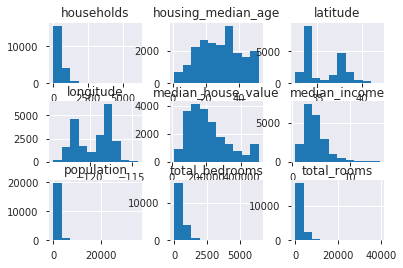

In [102]:
housing_df.hist()

## Pandas profiling offers a nice way to explore the data with one line of code.

In [103]:
pandas_profiling.ProfileReport(housing_df)

Number of variables,10
Number of observations,20640
Total Missing (%),0.5%
Total size in memory,1.6 MiB
Average record size in memory,80.0 B
Numeric,7
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,2


# Finally, lets build a model!


In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators='warn',
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. versionchanged:: 0.20
    

In [106]:
rf = RandomForestRegressor(n_jobs=-1)

In [107]:
rf.fit(X = housing_df.drop('median_house_value', axis =1), y = housing_df.median_house_value)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'NEAR BAY'

All of the models in sklearn require numeric data only as inputs (this isn't the case for some other libraries/models)

We'll learn more avout this in the future, but one way to fix it is one hot encoding

In [108]:
housing_df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [109]:
housing_df = pd.get_dummies(housing_df, columns=['ocean_proximity'])

In [110]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [111]:
rf.fit(X = housing_df.drop('median_house_value', axis =1), y = housing_df.median_house_value)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Models also need to have no nulls. In our case, we don't have that many so we'll remove the rows with nulls.

We'll learn more robust ways of dealing with missing data in the future.

In [112]:
housing_df.isna().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                   997
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [113]:
housing_not_null = housing_df.dropna().copy()

Finally we can build a model!!!!

In [114]:
rf.fit(X = housing_not_null.drop('median_house_value', axis =1), y = housing_not_null.median_house_value)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [115]:
rf.score(X = housing_not_null.drop('median_house_value', axis =1), y = housing_not_null.median_house_value)

0.9654217792076549

In [116]:
y_hat = rf.predict(housing_not_null.drop('median_house_value', axis =1))
housing_not_null['predicted_median_house_value'] = y_hat

In [117]:
import seaborn as sns

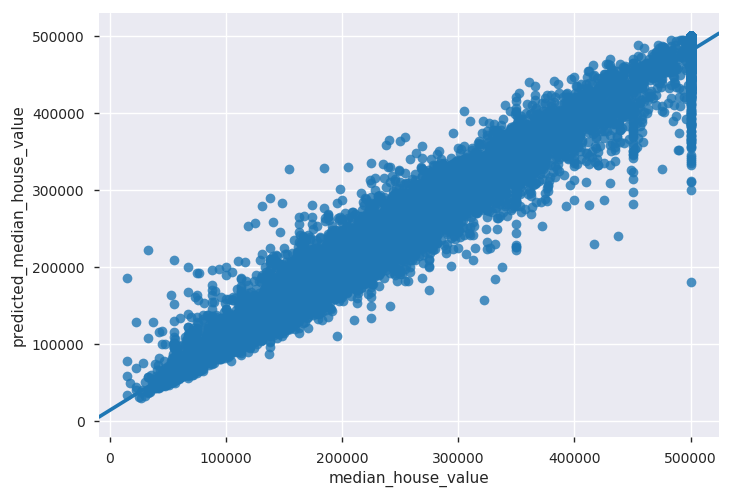

In [118]:
ax = sns.regplot(x="median_house_value", y="predicted_median_house_value", data=housing_not_null)

# Looks Like We Have Been Successful
But looks can be decieving

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = housing_not_null.drop('median_house_value', axis =1)
y = housing_not_null.median_house_value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
newRF = RandomForestRegressor(n_jobs=-1, n_estimators=100, max_depth=10)
newRF.fit(X = X_train, y = y_train)
print(f"Train Error: {newRF.score(X_train,y_train)}")
print(f"Test Error: {newRF.score(X_test,y_test)}")

# How can we use this model?
The model in itself isn't that useful for prediction. If you already know the inputs (median income, number of rooms, etc...) you probably also already know median home value. That doesn't mean it's not useful! There are several things we can use this model for. 

1. Look at neighborhoods that aren't predicted well by the model.
    1. What is unique about these?
2. Use model to predict on other states to find out which ones have similar pricing habits (investment?)
3. Interrogate the model to let you know what the main drivers of home value.
    1. Location?
    1. Income?